## Gather Data

In [19]:
import pandas as pd
import requests
import os
import json
import sys
import re
import datetime
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data into a dataframe
weRateDogs = pd.read_csv("twitter-archive-enhanced.csv")
weRateDogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# fetching data from url and writing it into a tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open('image-predictions.tsv','wb') as f:
    f.write(r.content)

In [4]:
# reading the fetched tsv file and saving it into a dataframe
dog_twit = pd.read_csv('image-predictions.tsv',sep='\t')
dog_twit

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
import tweepy
from config import Config
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

fetching twitter data and writing it into a txt file

In [12]:
# complete information using twitter API
with open('tweet_json.txt','w') as f:
    # call infos
    for i in weRateDogs['tweet_id']:
        # handling exception
        try:
            tweet = api.get_status(i,tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write("\n")
        #except:
         #   e = os.sys.exc_info()[0]
        except tweepy.TweepError as e:
            print(e)

[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 502


[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

Rate limit reached. Sleeping for: 760


[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 779


In [38]:
# Defining the elements to be retained 
retain_elements = ['id', 'favorite_count', 'retweet_count']

# Defining the required Dictionary
data = []
with open('tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionary = json.loads(json_tweet)
        data_row = dict((i, dictionary[i]) for i in retain_elements)
        data.append(data_row)
        json_tweet = r.readline()
        
            
# creating DataFrame    
df_gat_data = pd.DataFrame.from_dict(data)

df_gat_data

,id,favorite_count,retweet_count
0,892420643555336193,35177,7426
1,892177421306343426,30456,5523
2,891815181378084864,22910,3647
3,891689557279858688,38442,7596
4,891327558926688256,36716,8187
...,...,...,...
2326,666049248165822465,94,39
2327,666044226329800704,261,123
2328,666033412701032449,107,39
2329,666029285002620928,118,41


In [39]:
df_gat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


# Assess Data
### Programatic assessment of the data

In [40]:
weRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [41]:
dog_twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
weRateDogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
1823,676533798876651520,NaN,NaN,2015-12-14 22:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676533798...,12,10,None,None,None,None,None
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,None,None,None,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None


In [219]:
dog_twit.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
633,680970795137544192,https://pbs.twimg.com/media/CXNLU6wWkAE0OkJ.jpg,1,pug,0.713102,True,whippet,0.057426,True,quilt,0.056018,False
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013412,False,Old_English_sheepdog,0.009671,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True


In [221]:
dog_twit.shape

(2075, 12)

In [44]:
weRateDogs.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Emma         1
Timmy        1
Livvie       1
Perry        1
Apollo       1
Name: name, Length: 957, dtype: int64

- out of 957 values, 745 are null
- either the dogs were not named or the owner forgot to fill in the details for name

### 1: Quality Issues

#### table: weRateDogs
- tweet_id shouldn't be int
- source column has html elements together with the url
- timestamp column is not datetime object
- inconsistency in  dog name in name column
- missing dog name for name column
- columns doggo,floofer,pupper,puppo has NaN value as 'None'
- Unwanted retweets present

#### table: dog_twit
- tweet_id shouldn't be int
- column values not in percentage (p1_conf,p2_conf,p3_conf)
- inconsistent p1,p2,p3 column values

#### table: df_gat_data
- id shouldn't be int

### 2: Tidyness issues
- un-necessary many columns (doggo,floofer,pupper,puppo) in weRateDogs table
- Joining the three tables into one with only relevant columns


# Clean Data
### Cleaning Quality Issues

In [186]:
# making a copy of the original dataframe
weRateDogs_clean = weRateDogs.copy()
dog_twit_clean = dog_twit.copy()
df_gat_data_clean = df_gat_data.copy()

#### 1: Changing "tweet_id" data-type for all the three tables from INT to String
- The value in the tweet column is very large for a INT data-type.

In [187]:
weRateDogs_clean['tweet_id'] = weRateDogs_clean['tweet_id'].astype(str)
dog_twit_clean['tweet_id'] = dog_twit_clean['tweet_id'].astype(str)
df_gat_data_clean['id'] = df_gat_data_clean['id'].astype(str)

In [188]:
# verifying the changes made
print(weRateDogs_clean['tweet_id'].dtypes)
print(dog_twit_clean['tweet_id'].dtypes)
print(df_gat_data_clean['id'].dtypes)

object
object
object


#### 2: Removing html elements

In [189]:
weRateDogs_clean['source'] = weRateDogs_clean['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

In [190]:
# verifying the cleaning 
weRateDogs_clean.source.head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

#### 3: Converting the timestamp column to datatime object

In [191]:
weRateDogs_clean['timestamp'] = pd.to_datetime(weRateDogs_clean['timestamp'])

In [192]:
# verifying the changes
weRateDogs_clean['timestamp'].dtypes

datetime64[ns, UTC]

#### 4: Converting the names in name colummn to lower-case
- Bring about consistency and helpful in querying

In [193]:
# converting to lowercase and verifying 
weRateDogs_clean['name'] = weRateDogs_clean['name'].str.lower()
weRateDogs_clean.iloc[:,12:15].sample(5)

,name,doggo,floofer
1037,harvey,None,None
973,none,None,None
492,atlas,None,None
2295,gabe,None,None
1247,gary,None,None


#### 5: Filling in the missing dog name for name column
- The 'text' column value does mention about the dog names in their tweets.

In [194]:
weRateDogs_clean.name.value_counts()

none            745
a                55
charlie          12
oliver           11
lucy             11
               ... 
rinna             1
cecil             1
by                1
unacceptable      1
rumble            1
Name: name, Length: 957, dtype: int64

In [195]:
# 55 dogs were named 'a'
# subsetting the dataframe into two dfs with 'a' as name inclused and not inlcuded.
df_with_names =  weRateDogs_clean.query('name != "a"')
df_without_names = weRateDogs_clean.query('name == "a"')

In [196]:
# Matching the pattern "This is a ", to replace "a" with name from the 'text' column
df_without_names['name'] = df_without_names['text'].str.extract('This\sis\sa\s([A-Za-z]+)',expand=True) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
# joining the two tables back
weRateDogs_clean = pd.concat([df_with_names,df_without_names])
weRateDogs_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,goose,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,726634734.0,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,none,None,None,None,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,hunter,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,atlas,None,None,None,None
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Juckson. He's totally on his way to a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033...,5,10,juckson,None,None,None,None


In [198]:
weRateDogs_clean.name.value_counts()

none       745
charlie     12
cooper      11
oliver      11
lucy        11
          ... 
crimson      1
batdog       1
theo         1
clarq        1
rumble       1
Name: name, Length: 996, dtype: int64

there is no name as 'a' anymore

#### 6: Changing None to NaN for columns (doggo,floofer,pupper,puppo)

In [199]:
weRateDogs_clean['doggo'] = weRateDogs_clean['doggo'].replace('None','NaN')
weRateDogs_clean['floofer'] = weRateDogs_clean['floofer'].replace('None','NaN')
weRateDogs_clean['pupper'] = weRateDogs_clean['pupper'].replace('None','NaN')
weRateDogs_clean['puppo'] = weRateDogs_clean['puppo'].replace('None','NaN')
weRateDogs_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2210,668620235289837568,NaN,NaN,2015-11-23 02:41:01+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",Say hello to Kallie. There was a tornado in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668620235...,10,10,kallie,NaN,NaN,NaN,NaN
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,brave,NaN,NaN,NaN,NaN
1675,682242692827447297,NaN,NaN,2015-12-30 16:51:48+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,samson,NaN,NaN,NaN,NaN
1864,675362609739206656,NaN,NaN,2015-12-11 17:12:48+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,12,10,daisy,NaN,NaN,NaN,NaN
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,taz,NaN,NaN,NaN,NaN


#### 7: Converting the column values for p1_conf,p2_conf,p3_conf into percentage form

In [200]:
dog_twit_clean['p1_conf'] = round(dog_twit_clean['p1_conf']*100,1)
dog_twit_clean['p2_conf'] = round(dog_twit_clean['p2_conf']*100,1)
dog_twit_clean['p3_conf'] = round(dog_twit_clean['p3_conf']*100,1)
dog_twit_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5,True,collie,15.7,True,Shetland_sheepdog,6.1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.7,True,miniature_pinscher,7.4,True,Rhodesian_ridgeback,7.2,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True


#### 8: Converting columns p1,p2,p3 name values to lower case 

In [225]:
dog_twit_clean['p1'] = dog_twit_clean['p1'].str.lower()
dog_twit_clean['p2'] = dog_twit_clean['p2'].str.lower()
dog_twit_clean['p3'] = dog_twit_clean['p3'].str.lower()
dog_twit_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,46.5,True,collie,15.7,True,shetland_sheepdog,6.1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.7,True,miniature_pinscher,7.4,True,rhodesian_ridgeback,7.2,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0,True,rottweiler,24.4,True,doberman,15.5,True


#### 9: Removing retweets from text column

In [226]:
# Find all the retweets 
retweets = weRateDogs_clean.text.str.match('^RT @')

# Only keep the tweets that aren't retweets
weRateDogs_clean = weRateDogs_clean[~retweets]

In [228]:
# confirming the removal
weRateDogs_clean[retweets]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


### Cleaning Tidiness Issues

#### 1: Changing columns (doggo,floofer,pupper,puppo) in into one column as dog stage

In [202]:
# Function to create a single column from the 4 columns of dog stages

def Dog_Stage(row):
    # A list to store the data
    stage_list = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Appending the value to the list if the condition is met
        stage_list.append('doggo')
    if row['floofer'] == 'floofer':
        stage_list.append('floofer')
    if row['pupper'] == 'pupper':
        stage_list.append('pupper')
    if row['puppo'] == 'puppo':
        stage_list.append('puppo')
    if len(stage_list) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stage_list)
    return row

In [203]:
# Function call with weRateDogs_clean as argument
weRateDogs_clean = weRateDogs_clean.apply(Dog_Stage, axis=1)

In [204]:
# dropping the cleaned columns
weRateDogs_clean = weRateDogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [205]:
weRateDogs_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1888,674781762103414784,NaN,NaN,2015-12-10 02:44:43+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,none,None
2058,671347597085433856,NaN,NaN,2015-11-30 15:18:34+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Lola. She was not fully prepared for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671347597...,9,10,lola,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,none,doggo
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,none,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,bo,pupper


#### 2: Merging three cleaned tables into one

In [206]:
# renaming the id into tweet_id to match the other tables
df_gat_data_clean = df_gat_data_clean.rename({'id':'tweet_id'},axis=1)
df_gat_data_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35177,7426
1,892177421306343426,30456,5523
2,891815181378084864,22910,3647
3,891689557279858688,38442,7596
4,891327558926688256,36716,8187


In [224]:
# merging the three tables on tweet_id
data_frames = [weRateDogs_clean,dog_twit_clean,df_gat_data_clean]
tweeter_df = reduce(lambda left,right: pd.merge(left,right,on=['tweet_id'], how='outer'), data_frames)
tweeter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,9.7,False,bagel,8.6,False,banana,7.6,False,35177.0,7426.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,32.4,True,pekinese,9.1,True,papillon,6.9,True,30456.0,5523.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,71.6,True,malamute,7.8,True,kelpie,3.1,True,22910.0,3647.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,17.0,False,labrador_retriever,16.8,True,spatula,4.1,False,38442.0,7596.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,55.6,True,english_springer,22.6,True,german_short-haired_pointer,17.5,True,36716.0,8187.0


In [230]:
# converting the merged dataframe into a csv
tweeter_df.to_csv('df_final.csv',index=False)

### Analysis of df_final

In [22]:
df = pd.read_csv('df_final.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,9.7,False,bagel,8.6,False,banana,7.6,False,35177.0,7426.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,32.4,True,pekinese,9.1,True,papillon,6.9,True,30456.0,5523.0


#### Looking for relationship between the retweet_count and favorite_count

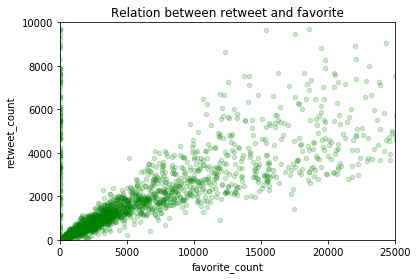

In [24]:
# scatterplot to see relationship between the retweet_count and favorite_count

xlim = (0, 25000)   # to zoom in on data points for better clearity
ylim = (0, 10000)   # to zoom in on data points for better clearity
df.plot(kind = 'scatter', x='favorite_count',y = 'retweet_count',color='Green',alpha=0.2,ylim=ylim, xlim=xlim);
plt.title('Relation between retweet and favorite');

We see that the ratio of retweet_count to favorite_count is lower as the favorite_count is much higher in comparison to the retweet_count. People tend to favor just liking the tweet rather than retweeting it.

#### Looking at the retweet and favorite relation through dog stages

In [25]:
# Creating a separate dataframe for each dog stage
df_puppers = df[df['stage'] == 'pupper']
df_puppo = df[df['stage'] == 'puppo']
df_doggo = df[df['stage'] == 'doggo']
df_floofer = df[df['stage'] == 'floofer']
df_none = df[df['stage'] == 'None']

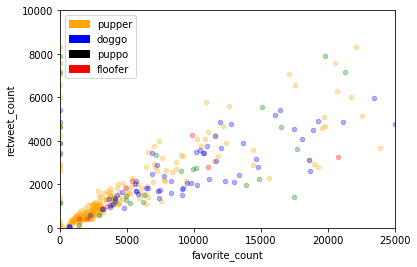

In [28]:
import matplotlib.patches as mp
xlim = (0, 25000)   # to zoom in on data points for better clearity
ylim = (0, 10000)   # to zoom in on data points for better clearity

bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', alpha=0.3,ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=bx, alpha=0.3,ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=bx, alpha=0.3,ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=bx, alpha=0.3,ylim=ylim, xlim=xlim)


# Legend for each stage
puppers = mp.Patch(label='pupper', color = 'Orange')
doggo = mp.Patch(label='doggo', color = 'Blue')
puppo = mp.Patch(label='puppo', color = 'Black')
floofer = mp.Patch(label='floofer', color = 'Red')

plt.legend(handles=[puppers, doggo, puppo, floofer])

plt.show()

We see a lot of dogs in their pupper stage concentrated in the lower left section. It looks like dogs in their doggo stage tend to be more popular. Pupper seems to be popular too collecting a lot of reweets and likes.

#### Looking at dog popularity using p1 prediction

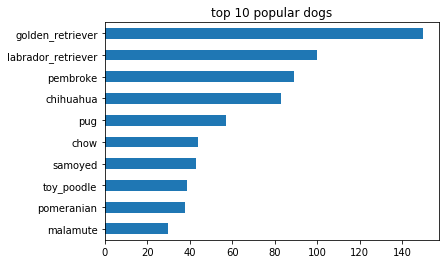

In [29]:
# bar plot showing the top 10 popular dogs.
df['p1'].value_counts().head(10)[9::-1].plot(kind='barh')
plt.title('top 10 popular dogs');

The plot shows a clear winner as golden retriever followed by labrador in terms of popularity. The metric to measure this popularity was the prediction column 'p1'. As it is obvious, more the mentions, more popular it is. 